In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv('/content/CarPrice.csv')

# Check the first few rows of the dataset
print(df.head())

# Check for missing values and data types
print(df.info())
print(df.describe())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Inspect data types for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns: ", categorical_cols)

# Get numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Fill missing values in numerical columns with the median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with the mode (most frequent value)
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check again for missing values
print("Missing values after handling:\n", df.isnull().sum())


Missing values before handling:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Categorical Columns:  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
Missing values after handling:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody     

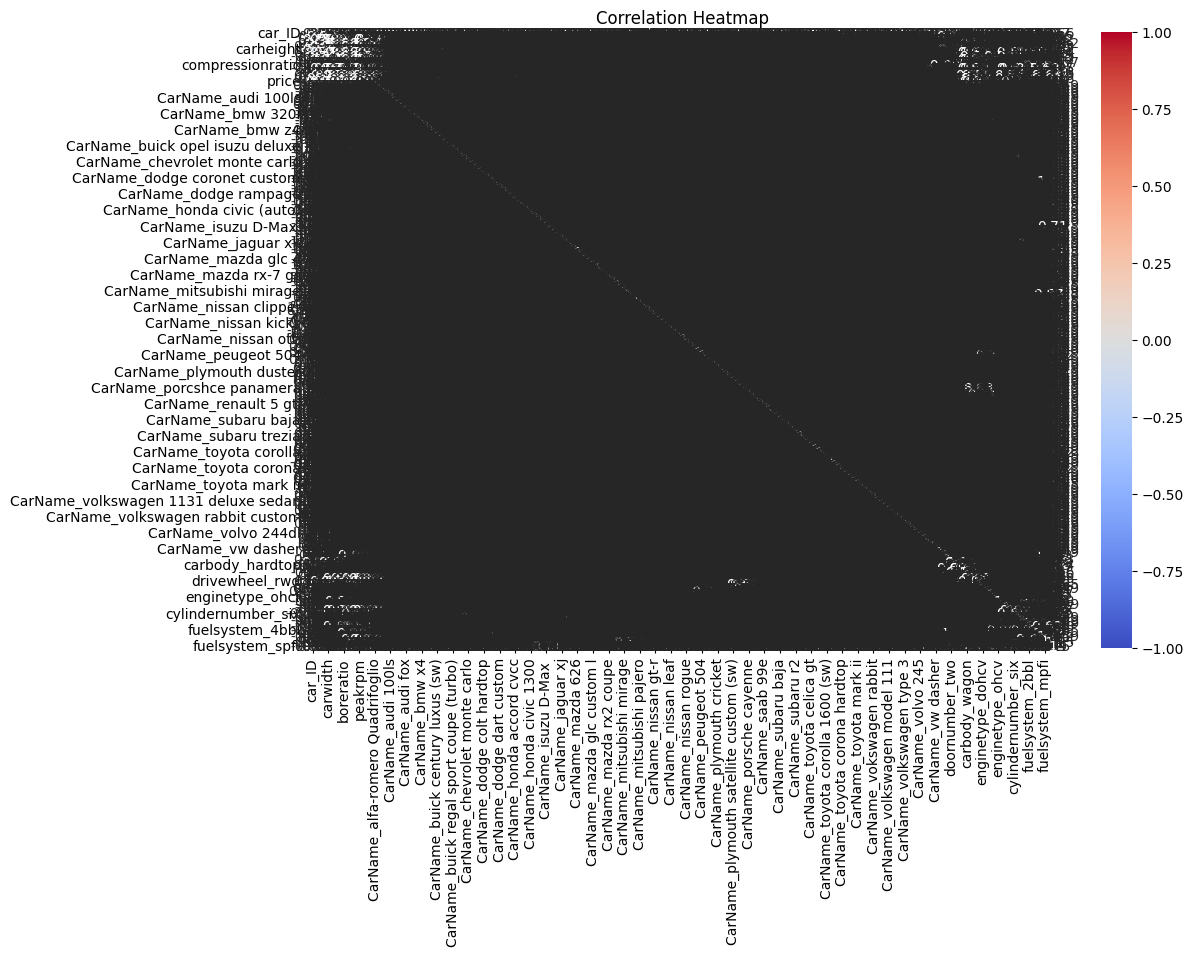

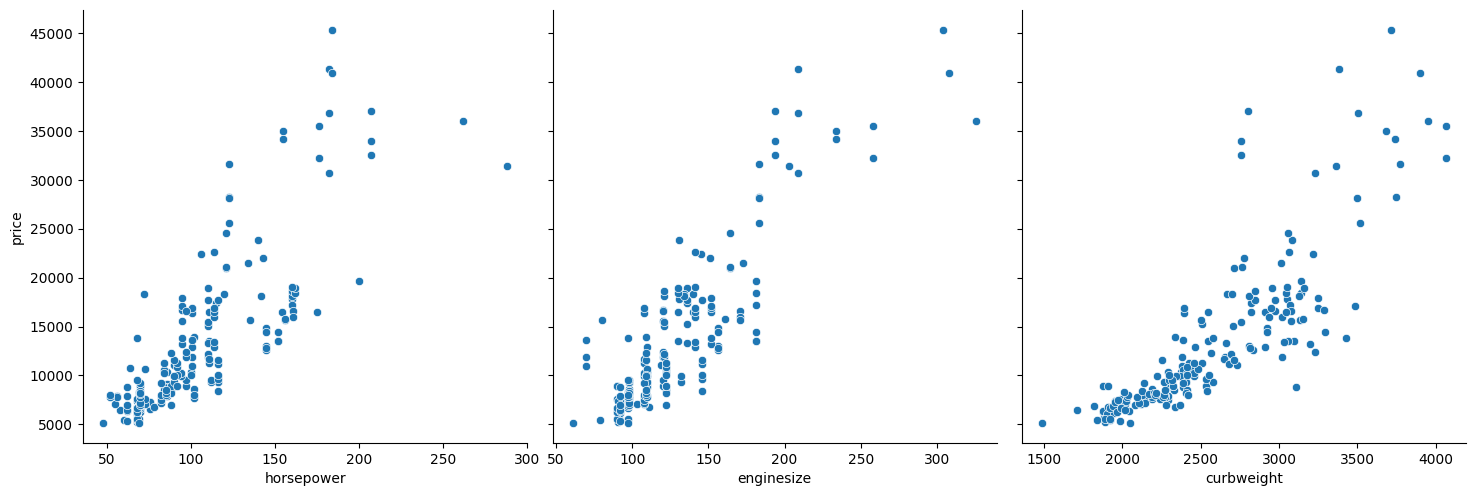

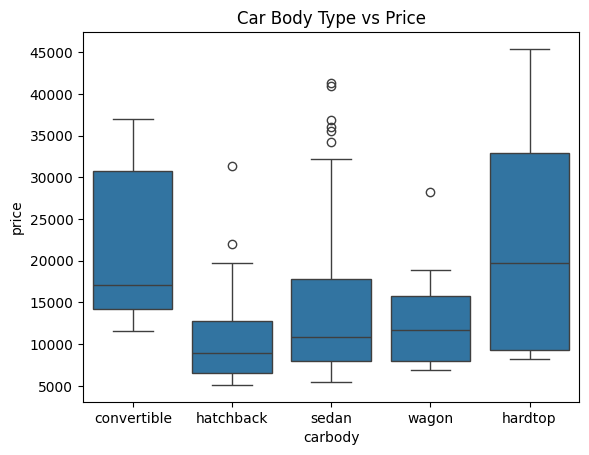

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the dataset is already cleaned
# Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation Heatmap (use only numerical columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot to analyze relationships (with relevant numerical columns)
sns.pairplot(df, x_vars=['horsepower', 'enginesize', 'curbweight'], y_vars='price', height=5)
plt.show()

# Plot car types vs price (categorical column 'carbody' is kept as is for boxplot)
sns.boxplot(x="carbody", y="price", data=df)
plt.title("Car Body Type vs Price")
plt.show()


In [ ]:
# Separate target (y) and features (X)
X = df.drop(['price', 'car_ID', 'CarName'], axis=1)  # Drop 'price' (target) and irrelevant columns
y = df['price']

# List of categorical and numerical features
categorical_features = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
numeric_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Preprocessing: Numeric features will be scaled, and categorical features will be one-hot encoded
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Print the column names of your dataframe
print("Columns in X_train:", X_train.columns)

# Check that all specified columns exist in X_train
numerical_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
categorical_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Ensure these columns exist in the dataframe
for col in numerical_cols + categorical_cols:
    if col not in X_train.columns:
        print(f"Error: Column '{col}' is not in the dataframe.")

# Now define the preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Fit the model on training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Ridge): {mse}")


Columns in X_train: Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')
Error: Column 'CarName' is not in the dataframe.


ValueError: A given column is not a column of the dataframe

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming you have already split the data into X_train, X_test, y_train, y_test

# Example of the preprocessor handling both numerical and categorical data
numerical_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
categorical_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Define the preprocessor for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define the model pipeline with Ridge regression
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))])  # Ridge regularization with alpha=1.0

# Fit the model on training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Ridge): {mse}")


ValueError: A given column is not a column of the dataframe

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import streamlit as st

# Load dataset
df = pd.read_csv('/content/CarPrice.csv')

# Drop duplicates
df = df.drop_duplicates()

# Fill missing values
numerical_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
categorical_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Feature and target split
X = df[numerical_cols + categorical_cols]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Model pipeline
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Train model
ridge_model.fit(X_train, y_train)

# Evaluate model
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Ridge): {mse}")


Mean Squared Error (Ridge): 9983866.196937293


In [ ]:
# Streamlit App for Car Price Prediction
st.title("Advanced Car Price Prediction")

# Get user input
symboling = st.slider('Symboling (Risk factor)', -3, 3, 0)
wheelbase = st.number_input('Wheelbase (inches)', value=88.6)
carlength = st.number_input('Car Length (inches)', value=168.8)
carwidth = st.number_input('Car Width (inches)', value=64.1)
carheight = st.number_input('Car Height (inches)', value=48.8)
curbweight = st.number_input('Curb Weight (lbs)', value=2548)
enginesize = st.number_input('Engine Size (cc)', value=130)
boreratio = st.number_input('Bore Ratio', value=3.47)
stroke = st.number_input('Stroke', value=2.68)
compressionratio = st.number_input('Compression Ratio', value=9.0)
horsepower = st.number_input('Horsepower', value=111)
peakrpm = st.number_input('Peak RPM', value=5000)
citympg = st.number_input('City MPG', value=21)
highwaympg = st.number_input('Highway MPG', value=27)

# Categorical Inputs
CarName = st.selectbox('Car Name', df['CarName'].unique())
fueltype = st.selectbox('Fuel Type', df['fueltype'].unique())
aspiration = st.selectbox('Aspiration', df['aspiration'].unique())
doornumber = st.selectbox('Door Number', df['doornumber'].unique())
carbody = st.selectbox('Car Body', df['carbody'].unique())
drivewheel = st.selectbox('Drive Wheel', df['drivewheel'].unique())
enginelocation = st.selectbox('Engine Location', df['enginelocation'].unique())
enginetype = st.selectbox('Engine Type', df['enginetype'].unique())
cylindernumber = st.selectbox('Cylinder Number', df['cylindernumber'].unique())
fuelsystem = st.selectbox('Fuel System', df['fuelsystem'].unique())

# Prepare input for the model
input_data = pd.DataFrame({
    'symboling': [symboling],
    'wheelbase': [wheelbase],
    'carlength': [carlength],
    'carwidth': [carwidth],
    'carheight': [carheight],
    'curbweight': [curbweight],
    'enginesize': [enginesize],
    'boreratio': [boreratio],
    'stroke': [stroke],
    'compressionratio': [compressionratio],
    'horsepower': [horsepower],
    'peakrpm': [peakrpm],
    'citympg': [citympg],
    'highwaympg': [highwaympg],
    'CarName': [CarName],
    'fueltype': [fueltype],
    'aspiration': [aspiration],
    'doornumber': [doornumber],
    'carbody': [carbody],
    'drivewheel': [drivewheel],
    'enginelocation': [enginelocation],
    'enginetype': [enginetype],
    'cylindernumber': [cylindernumber],
    'fuelsystem': [fuelsystem]
})

# Make prediction
if st.button('Predict Price'):
    predicted_price = ridge_model.predict(input_data)
    st.write(f"Predicted Car Price: ${predicted_price[0]:.2f}")



2025-02-17 05:25:39.669 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 05:25:39.902 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-17 05:25:39.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 05:25:39.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 05:25:39.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 05:25:39.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 05:25:39.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 05:25:39.925 Thread 'MainThread': mi

In [ ]:
!streamlit run car_price_prediction.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: car_price_prediction.py


In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
import os
from pyngrok import ngrok

# Create and write the Streamlit app code into a Python file
streamlit_code = """
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

st.title("Advanced Car Price Prediction")

# Load dataset
df = pd.read_csv('/content/CarPrice.csv')

# Drop duplicates
df = df.drop_duplicates()

# Fill missing values
numerical_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
categorical_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Feature and target split
X = df[numerical_cols + categorical_cols]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Model pipeline
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Train model
ridge_model.fit(X_train, y_train)

# Get user input from Streamlit widgets
symboling = st.slider('Symboling (Risk factor)', -3, 3, 0)
wheelbase = st.number_input('Wheelbase (inches)', value=88.6)
carlength = st.number_input('Car Length (inches)', value=168.8)
carwidth = st.number_input('Car Width (inches)', value=64.1)
carheight = st.number_input('Car Height (inches)', value=48.8)
curbweight = st.number_input('Curb Weight (lbs)', value=2548)
enginesize = st.number_input('Engine Size (cc)', value=130)
boreratio = st.number_input('Bore Ratio', value=3.47)
stroke = st.number_input('Stroke', value=2.68)
compressionratio = st.number_input('Compression Ratio', value=9.0)
horsepower = st.number_input('Horsepower', value=111)
peakrpm = st.number_input('Peak RPM', value=5000)
citympg = st.number_input('City MPG', value=21)
highwaympg = st.number_input('Highway MPG', value=27)

# Categorical Inputs
CarName = st.selectbox('Car Name', df['CarName'].unique())
fueltype = st.selectbox('Fuel Type', df['fueltype'].unique())
aspiration = st.selectbox('Aspiration', df['aspiration'].unique())
doornumber = st.selectbox('Door Number', df['doornumber'].unique())
carbody = st.selectbox('Car Body', df['carbody'].unique())
drivewheel = st.selectbox('Drive Wheel', df['drivewheel'].unique())
enginelocation = st.selectbox('Engine Location', df['enginelocation'].unique())
enginetype = st.selectbox('Engine Type', df['enginetype'].unique())
cylindernumber = st.selectbox('Cylinder Number', df['cylindernumber'].unique())
fuelsystem = st.selectbox('Fuel System', df['fuelsystem'].unique())

# Prepare input for the model
input_data = pd.DataFrame({
    'symboling': [symboling],
    'wheelbase': [wheelbase],
    'carlength': [carlength],
    'carwidth': [carwidth],
    'carheight': [carheight],
    'curbweight': [curbweight],
    'enginesize': [enginesize],
    'boreratio': [boreratio],
    'stroke': [stroke],
    'compressionratio': [compressionratio],
    'horsepower': [horsepower],
    'peakrpm': [peakrpm],
    'citympg': [citympg],
    'highwaympg': [highwaympg],
    'CarName': [CarName],
    'fueltype': [fueltype],
    'aspiration': [aspiration],
    'doornumber': [doornumber],
    'carbody': [carbody],
    'drivewheel': [drivewheel],
    'enginelocation': [enginelocation],
    'enginetype': [enginetype],
    'cylindernumber': [cylindernumber],
    'fuelsystem': [fuelsystem]
})

# Make prediction
if st.button('Predict Price'):
    predicted_price = ridge_model.predict(input_data)
    st.write(f"Predicted Car Price: ${predicted_price[0]:.2f}")
"""

# Save the Streamlit code to a file
with open('app.py', 'w') as f:
    f.write(streamlit_code)

# Set up the public URL using ngrok
!ngrok authtoken 2rvvolsWsW87gj7DnAclUAMK8hc_LSSexBgCvkgKGVfCC4cz  # Replace 'YOUR_NGROK_AUTH_TOKEN' with your actual ngrok auth token
public_url = ngrok.connect(port='8501')
print(f"Public URL: {public_url}")

# Run the Streamlit app
!streamlit run app.py


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [ ]:
!pip install --upgrade pyngrok  # Update to the latest version

# ... (rest of your code) ...

# Set up the public URL using ngrok
!ngrok authtoken 2rvvolsWsW87gj7DnAclUAMK8hc_LSSexBgCvkgKGVfCC4cz
# Connect with 'bind_tls' set to True for HTTPv2 tunnels
public_url = ngrok.connect(8501, bind_tls=True)
print(f"Public URL: {public_url}")

# ... (rest of your code) ...

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://c336-34-136-66-173.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
import os
from pyngrok import ngrok

# Create and write the Streamlit app code into a Python file
streamlit_code = """
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

st.title("Advanced Car Price Prediction")

# Load dataset
df = pd.read_csv('/content/CarPrice.csv')

# Drop duplicates
df = df.drop_duplicates()

# Fill missing values
numerical_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
categorical_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Feature and target split
X = df[numerical_cols + categorical_cols]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Model pipeline
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Train model
ridge_model.fit(X_train, y_train)

# Get user input from Streamlit widgets
symboling = st.slider('Symboling (Risk factor)', -3, 3, 0)
wheelbase = st.number_input('Wheelbase (inches)', value=88.6)
carlength = st.number_input('Car Length (inches)', value=168.8)
carwidth = st.number_input('Car Width (inches)', value=64.1)
carheight = st.number_input('Car Height (inches)', value=48.8)
curbweight = st.number_input('Curb Weight (lbs)', value=2548)
enginesize = st.number_input('Engine Size (cc)', value=130)
boreratio = st.number_input('Bore Ratio', value=3.47)
stroke = st.number_input('Stroke', value=2.68)
compressionratio = st.number_input('Compression Ratio', value=9.0)
horsepower = st.number_input('Horsepower', value=111)
peakrpm = st.number_input('Peak RPM', value=5000)
citympg = st.number_input('City MPG', value=21)
highwaympg = st.number_input('Highway MPG', value=27)

# Categorical Inputs
CarName = st.selectbox('Car Name', df['CarName'].unique())
fueltype = st.selectbox('Fuel Type', df['fueltype'].unique())
aspiration = st.selectbox('Aspiration', df['aspiration'].unique())
doornumber = st.selectbox('Door Number', df['doornumber'].unique())
carbody = st.selectbox('Car Body', df['carbody'].unique())
drivewheel = st.selectbox('Drive Wheel', df['drivewheel'].unique())
enginelocation = st.selectbox('Engine Location', df['enginelocation'].unique())
enginetype = st.selectbox('Engine Type', df['enginetype'].unique())
cylindernumber = st.selectbox('Cylinder Number', df['cylindernumber'].unique())
fuelsystem = st.selectbox('Fuel System', df['fuelsystem'].unique())

# Prepare input for the model
input_data = pd.DataFrame({
    'symboling': [symboling],
    'wheelbase': [wheelbase],
    'carlength': [carlength],
    'carwidth': [carwidth],
    'carheight': [carheight],
    'curbweight': [curbweight],
    'enginesize': [enginesize],
    'boreratio': [boreratio],
    'stroke': [stroke],
    'compressionratio': [compressionratio],
    'horsepower': [horsepower],
    'peakrpm': [peakrpm],
    'citympg': [citympg],
    'highwaympg': [highwaympg],
    'CarName': [CarName],
    'fueltype': [fueltype],
    'aspiration': [aspiration],
    'doornumber': [doornumber],
    'carbody': [carbody],
    'drivewheel': [drivewheel],
    'enginelocation': [enginelocation],
    'enginetype': [enginetype],
    'cylindernumber': [cylindernumber],
    'fuelsystem': [fuelsystem]
})

# Make prediction
if st.button('Predict Price'):
    predicted_price = ridge_model.predict(input_data)
    st.write(f"Predicted Car Price: ${predicted_price[0]:.2f}")
"""

# Save the Streamlit code to a file
with open('app.py', 'w') as f:
    f.write(streamlit_code)

# Set up the public URL using ngrok
!ngrok authtoken 2rvvolsWsW87gj7DnAclUAMK8hc_LSSexBgCvkgKGVfCC4cz  # Replace 'YOUR_NGROK_AUTH_TOKEN' with your actual ngrok auth token
public_url = ngrok.connect(port='8501')
print(f"Public URL: {public_url}")

# Run the Streamlit app
!streamlit run app.py


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}
